# 모집단, 표본, 확률변수

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

구할 수 있는 또는 구해진 몇 개의 데이터만을 이용하여
전체 데이터에 대한 통계적 성질을 추측하는 추측통계의 기본 개념을 소개한다.

- 모집단
- 표본
- 표본추출
- 확률분포
- 확률변수

## 모집단과 표본

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch04/img-4-1.jpg?raw=true" style="width:600px"></div></p>

**모집단 예제: 캘리포니아 주택가격 데이터**

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
housing = housing.loc[:, ['median_income', 'median_house_value']].copy()

In [9]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


<Axes: xlabel='median_income', ylabel='median_house_value'>

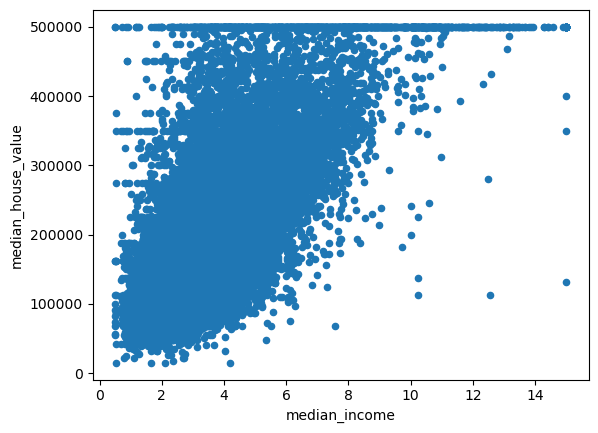

In [10]:
housing.plot.scatter('median_income', 'median_house_value')

In [11]:
housing.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


**마스크와 부울 인덱싱**

In [12]:
house_value_max = housing['median_house_value'].max()
house_value_max

500001.000000

In [13]:
mask = housing['median_house_value'] == house_value_max
mask

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [14]:
mask.sum()

965

In [15]:
housing_ = housing[~mask]

In [16]:
housing_.shape

(19675, 2)

<Axes: xlabel='median_income', ylabel='median_house_value'>

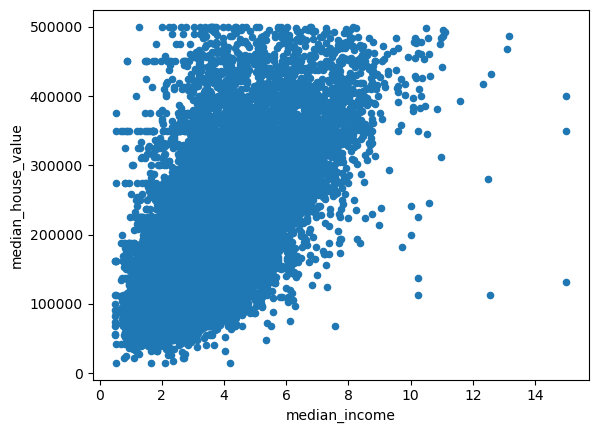

In [17]:
housing_.plot.scatter('median_income', 'median_house_value')

In [18]:
housing = housing_.copy()

In [19]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


## 표본추출 

**무작위 샘플링**

In [20]:
random_sampling = housing.sample(frac=0.1, random_state=1234)
random_sampling

,median_income,median_house_value
15905,1.9464,249000.0
13,2.6736,191300.0
12259,1.8845,77700.0
13028,3.0533,112100.0
17185,4.8405,354300.0
...,...,...
14830,2.0213,110600.0
18112,5.4842,335300.0
15836,4.2667,338800.0
6027,2.8983,129200.0


In [21]:
random_sampling.describe()

,median_income,median_house_value
count,1968.000000,1968.000000
mean,3.684852,190022.357215
std,1.588749,97040.161305
min,0.682500,14999.000000
25%,2.515175,115575.000000
50%,3.469050,173300.000000
75%,4.603050,244925.000000
max,13.110700,500000.000000


In [22]:
random_sampling.var()

median_income         2.524123e+00
median_house_value    9.416793e+09
dtype: float64

In [23]:
random_sampling.var(ddof=0)

median_income         2.522841e+00
median_house_value    9.412008e+09
dtype: float64

## 계층 샘플링

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [25]:
housing

,median_income,median_house_value,income_cat
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
20635,1.5603,78100.0,2
20636,2.5568,77100.0,2
20637,1.7000,92300.0,2
20638,1.8672,84700.0,2


Text(0, 0.5, 'Number of districts')

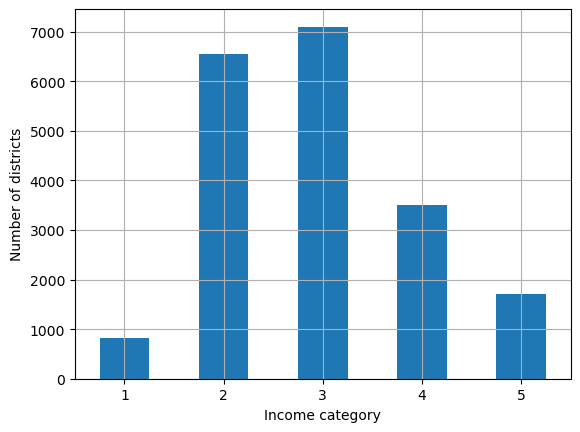

In [26]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [27]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)

In [28]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


**계층 샘플링**

In [29]:
stratified_sampling = stratification.apply(lambda y:y.sample(frac=0.1, random_state=1234), include_groups=False)
stratified_sampling

median_income  median_house_value
income_cat                                         
1          15062         1.3291            120800.0
           17524         0.7068            200000.0
           5177          1.0375             89800.0
           8373          1.2094            157500.0
           5225          0.9889             87500.0
...                         ...                 ...
5          18255         6.2884            414700.0
           10317        10.1299            454300.0
           1511          7.6877            367700.0
           12369         6.1437            232100.0
           10524         6.9343            298500.0

[1966 rows x 2 columns]

In [30]:
stratified_sampling_count = stratified_sampling.groupby(level=0, observed=False).count()
stratified_sampling_count

,median_income,median_house_value
income_cat,,
1,81,81
2,655,655
3,710,710
4,350,350
5,170,170


In [31]:
stratified_sampling_count.sum()

median_income         1966
median_house_value    1966
dtype: int64

**샘플링 결과 비교**

In [32]:
random_sampling = housing.sample(frac=0.1, random_state=1234)
random_sampling

,median_income,median_house_value,income_cat
15905,1.9464,249000.0,2
13,2.6736,191300.0,2
12259,1.8845,77700.0,2
13028,3.0533,112100.0,3
17185,4.8405,354300.0,4
...,...,...,...
14830,2.0213,110600.0,2
18112,5.4842,335300.0,4
15836,4.2667,338800.0,3
6027,2.8983,129200.0,2


In [33]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,76,76
2,668,668
3,691,691
4,353,353
5,180,180


In [34]:
random_sampling_count.sum()

median_income         1968
median_house_value    1968
dtype: int64

**오류율 비교표**

In [35]:
random_total = random_sampling_count.sum()
random_total

median_income         1968
median_house_value    1968
dtype: int64

In [36]:
stratified_total = stratified_sampling_count.sum()
stratified_total

median_income         1966
median_house_value    1966
dtype: int64

In [37]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.038618,0.038618
2,0.339431,0.339431
3,0.351118,0.351118
4,0.179370,0.179370
5,0.091463,0.091463


In [38]:
stratified_sampling_ratio = stratified_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.041200,0.041200
2,0.333164,0.333164
3,0.361139,0.361139
4,0.178026,0.178026
5,0.086470,0.086470


In [39]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


In [40]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]], 
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체(%)', '계층 샘플링(%)', '무작위 샘플링(%)']
proportions.index.name = '소득 구간'
proportions

,전체(%),계층 샘플링(%),무작위 샘플링(%)
소득 구간,,,
1,0.041372,0.041200,0.038618
2,0.333011,0.333164,0.339431
3,0.361017,0.361139,0.351118
4,0.177992,0.178026,0.179370
5,0.086607,0.086470,0.091463


In [41]:
proportions["계층 샘플링 오류율(%)"] = (proportions["계층 샘플링(%)"] / proportions["전체(%)"] - 1)
proportions["무작위 샘플링 오류율(%)"] = (proportions["무작위 샘플링(%)"] / proportions["전체(%)"] - 1)

In [42]:
proportions

,전체(%),계층 샘플링(%),무작위 샘플링(%),계층 샘플링 오류율(%),무작위 샘플링 오류율(%)
소득 구간,,,,,
1,0.041372,0.041200,0.038618,-0.004155,-0.066576
2,0.333011,0.333164,0.339431,0.000457,0.019277
3,0.361017,0.361139,0.351118,0.000340,-0.027419
4,0.177992,0.178026,0.179370,0.000191,0.007739
5,0.086607,0.086470,0.091463,-0.001586,0.056070


In [43]:
proportions = (proportions *100).round(2)
proportions

,전체(%),계층 샘플링(%),무작위 샘플링(%),계층 샘플링 오류율(%),무작위 샘플링 오류율(%)
소득 구간,,,,,
1,4.14,4.12,3.86,-0.42,-6.66
2,33.30,33.32,33.94,0.05,1.93
3,36.10,36.11,35.11,0.03,-2.74
4,17.80,17.80,17.94,0.02,0.77
5,8.66,8.65,9.15,-0.16,5.61


**계층 샘플링 데이터만 활용**

In [44]:
stratified_sampling = stratified_sampling.reset_index(level=0, drop=True).sort_index()

In [45]:
stratified_sampling

,median_income,median_house_value
11,3.2705,241800.0
27,1.8080,105500.0
32,1.7969,110400.0
47,1.7348,137500.0
48,0.9506,187500.0
...,...,...
20589,1.6652,58900.0
20600,3.1029,71700.0
20610,1.3631,45500.0
20622,2.4167,67000.0


In [46]:
stratified_sampling.reset_index(drop=True, inplace=True)

In [47]:
stratified_sampling

,median_income,median_house_value
0,3.2705,241800.0
1,1.8080,105500.0
2,1.7969,110400.0
3,1.7348,137500.0
4,0.9506,187500.0
...,...,...
1961,1.6652,58900.0
1962,3.1029,71700.0
1963,1.3631,45500.0
1964,2.4167,67000.0


<Axes: xlabel='median_income', ylabel='median_house_value'>

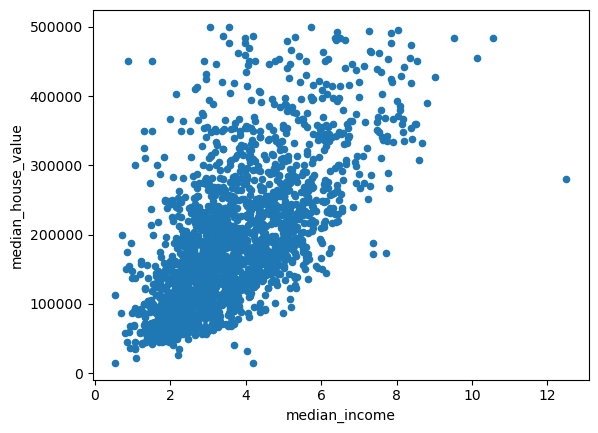

In [48]:
stratified_sampling.plot.scatter('median_income', 'median_house_value')

## 모평균 vs. 표본평균

In [49]:
housing.describe()

,median_income,median_house_value
count,19675.000000,19675.000000
mean,3.676717,192477.921017
std,1.570272,97711.509613
min,0.499900,14999.000000
25%,2.526800,116600.000000
50%,3.450000,173800.000000
75%,4.582600,248200.000000
max,15.000100,500000.000000


In [50]:
housing.drop(['income_cat'], axis=1, inplace=True)

In [51]:
housing.var()

median_income         2.465753e+00
median_house_value    9.547539e+09
dtype: float64

In [52]:
stratified_sampling.describe()

,median_income,median_house_value
count,1966.000000,1966.000000
mean,3.669090,194591.962360
std,1.557142,98903.683302
min,0.536000,14999.000000
25%,2.548650,122175.000000
50%,3.399750,178100.000000
75%,4.588850,246900.000000
max,12.500000,500000.000000


- 불편분산

In [53]:
stratified_sampling.var()

median_income         2.424690e+00
median_house_value    9.781939e+09
dtype: float64

- 표본분산(편향분산)

In [54]:
stratified_sampling.var(ddof=0)

median_income         2.423457e+00
median_house_value    9.776963e+09
dtype: float64

## 표본평균의 분포

In [55]:
housing.reset_index(drop=True, inplace=True)

In [56]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0
19673,1.8672,84700.0


**무작위 추출 활용**

In [57]:
total_number = housing.shape[0]
total_number

19675

**10% 샘플링**

In [58]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value
5149,4.9250,409800.0
11604,3.1020,111300.0
13396,3.5987,91400.0
7108,2.5966,170900.0
1036,2.6078,116700.0
...,...,...
1798,2.6750,22500.0
3100,3.5391,81900.0
4197,1.8576,193800.0
15649,3.1779,97300.0


In [59]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling.mean()

median_income              3.672965
median_house_value    189696.796645
dtype: float64

In [60]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent]
    print(f"{i+1}번째 샘플링:")
    print(sampling.mean())
    print()

1번째 샘플링:
median_income              3.672481
median_house_value    191358.057956
dtype: float64

2번째 샘플링:
median_income              3.637189
median_house_value    189475.241484
dtype: float64

3번째 샘플링:
median_income              3.680434
median_house_value    191375.699034
dtype: float64

4번째 샘플링:
median_income              3.742474
median_house_value    199356.380275
dtype: float64

5번째 샘플링:
median_income              3.696744
median_house_value    195126.690391
dtype: float64



In [61]:
housing.mean()

median_income              3.676717
median_house_value    192477.921017
dtype: float64

In [62]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent]
    income_mean[i] = sampling['median_income'].mean()

np.mean(income_mean)

3.677673